In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set a random seed for reproducibility
np.random.seed(0)

# Load your temperature dataset with columns "Date" and "Temperature"
data = pd.read_csv('AirPassengers.csv')

# Make sure your "Date" column is in datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Sorting the data by date (if not sorted)
data = data.sort_values(by='Month')

# Resetting the index
data.set_index('Month', inplace=True)

data.dropna(inplace=True)


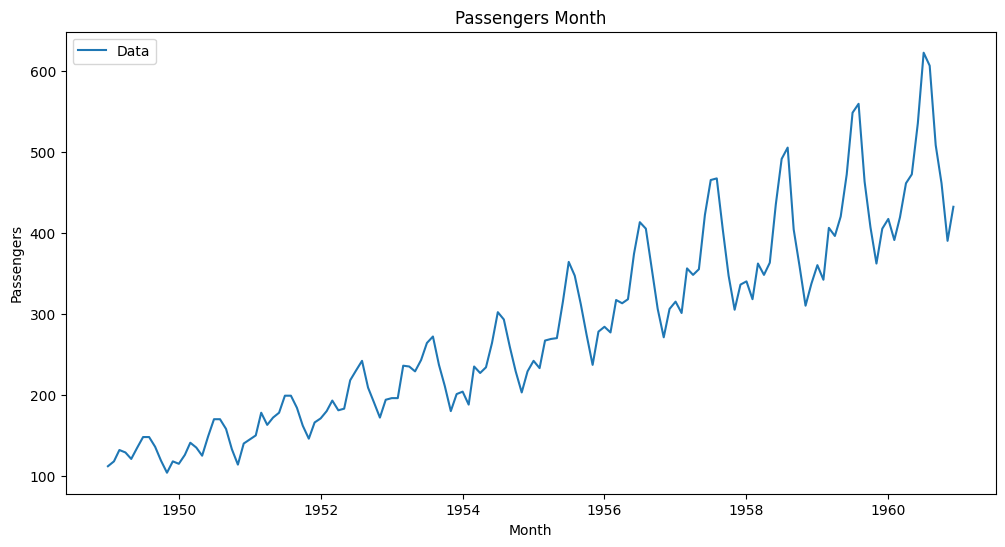

In [4]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( data['#Passengers'], label='Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.title('Passengers Month')
plt.show()
